In [ ]:
# если блок падает с ошибкой, раскомментируйте эту строчку и перезапустите ноутбук
# !pip install numpy pandas matplotlib scipy sklearn

import enum

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import linear_model, metrics, model_selection
from sklearn.datasets import fetch_california_housing
%matplotlib inline

## Цены на жильё

Это вторая и последняя домашка блока по статистике. Она проще и меньше чем первая, но она покрывает важную тему того, как мыслить в анализе данных (в частности в машинном обучении) статистически. 

Мы будем работать с готовым датасетом `California Housing` - это данные о ценах на жильё в Калифорнии вместе с разными характеристиками жилья, например количество комнат или широта расположения.

In [ ]:
data = fetch_california_housing(as_frame=True)

In [ ]:
X = data['data']
y = data['target']

Здесь $X$ - это данные о жилье, $y$ - стоимость. Обе эти переменные - это объекты класса `DataFrame` библиотеки pandas, которую очень любят аналитики. Она красиво отображает таблици и позволяет удобно проводить операции над табличными данными.

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Так можно посмотреть на свойства распределения значений по колонкам - среднее, стандартное отклонение и выборочные квантили.

In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

### 1. Решаем регрессию

Мы построим статистическую модель на этих данных и проверим её качество. Чтобы быть уверенными, что качество репрезентативно, сразу отделим часть данных так, как будто проверяем модель "в боевых действиях" - есть данные, на которых модель строится, а есть те, на которых она проверяется.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

Применим к данным модель линейной регрессии. Пусть $\epsilon$ - вектор независимых случайных величин, $\epsilon_i \sim \mathcal N(0, \sigma^2)$. $X$ - матрица размера $N_1\times p$, где $N_1$ - размер тренировочной выборки, $p$ - количество признаков каждого элемента. Тогда,

$y = X\beta + \epsilon$.

1. Для начала проверим наше предположение. Графически проверьте зависимость переменной $y$ от разных признаков $X$.

In [ ]:
# чтобы извлечь из Х отдельный признак, достаточно обратиться к нему по ключу:
ave_rooms = X_train['AveRooms']
# чтобы получить список всех признаков:
all_names = X_train.columns

In [ ]:
all_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

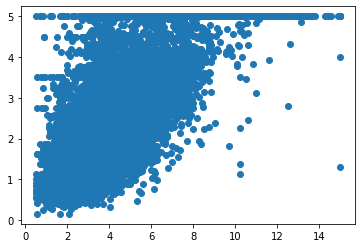

In [ ]:
plt.scatter(X_train['MedInc'], y_train)

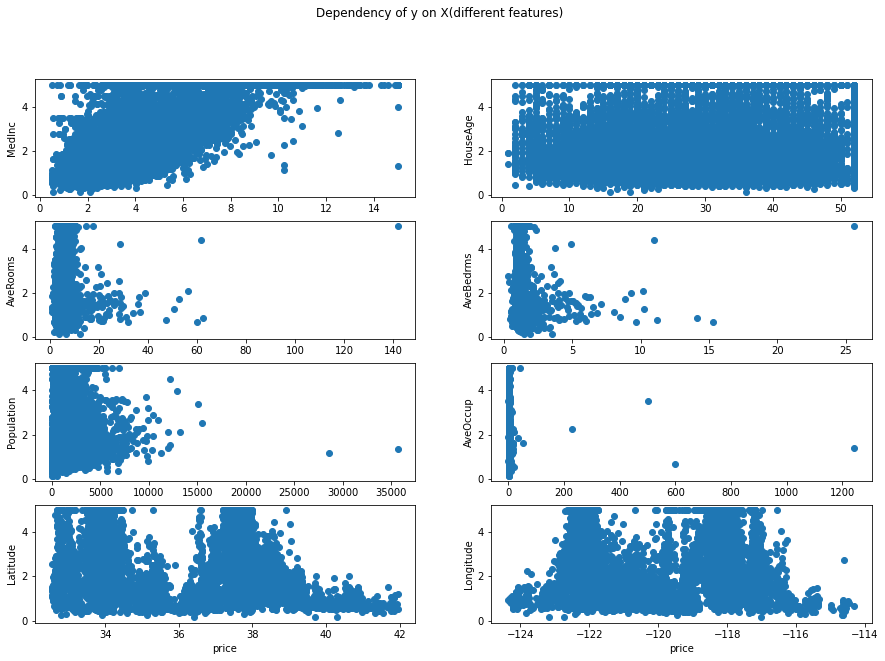

In [ ]:
# ваши графики и мысли

fig, axs = plt.subplots(4,2,figsize=(15, 10))
fig.suptitle('Dependency of y on X(different features)')

axs[0,0].scatter(X_train['MedInc'], y_train)
axs[0,0].set_ylabel('MedInc')

axs[0,1].scatter(X_train['HouseAge'], y_train)
axs[0,1].set_ylabel('HouseAge')

axs[1,0].scatter(X_train['AveRooms'], y_train)
axs[1,0].set_ylabel('AveRooms')

axs[1,1].scatter(X_train['AveBedrms'], y_train)
axs[1,1].set_ylabel('AveBedrms')

axs[2,0].scatter(X_train['Population'], y_train)
axs[2,0].set_ylabel('Population')

axs[2,1].scatter(X_train['AveOccup'], y_train)
axs[2,1].set_ylabel('AveOccup')

axs[3,0].scatter(X_train['Latitude'], y_train)
axs[3,0].set_ylabel('Latitude')

axs[3,1].scatter(X_train['Longitude'], y_train)
axs[3,1].set_ylabel('Longitude')

axs[3,0].set_xlabel('price')
axs[3,1].set_xlabel('price')

plt.show()

2. Вспомним решение задачи линейной регрессии методом наименьших квадратов:

$\hat{\beta} = (X^TX)^{-1}X^Ty$

In [ ]:
# вычислите оценку. помните, что для построения модели мы пользуемся только тренировочной частью выборки
hat_beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train)) # используйте X_train, y_train
hat_beta

array([ 5.17835361e-01,  1.58210726e-02, -1.90411389e-01,  9.66070523e-01,
        1.23028359e-05, -4.15816410e-03, -6.11622829e-02, -1.47199895e-02])

Теперь, нам приходят новые данные $X_t$ (X_test). Предсказанием для них в нашей модели, очевидно, будет

$\hat{y_t} = X_t\hat{\beta}$.

Теперь сравним $y_t$ (y_test) и $\hat{y_t}$. Для этого вычислим сумму квадратов наших ошибок 

$e = \sum_{i=1}^n(y_{ti} - \hat{y_t}_i)^2$.

In [ ]:
# вычислите предсказание модели и ошибку
y_hat = X_test.dot(hat_beta)
e = np.linalg.norm(y_test - y_hat) / np.linalg.norm(y_test)
# эта ошибка большая или маленькая? а в процентном соотношении?

In [ ]:
e

0.32979720170726035

В нашем предположении тренировочные и тестовые данные имеют одно и то же распределение, то есть если $N_2$ - размер тестовой выборки, а $\epsilon_t$ - вектор независимых случайных величин с распределением $\mathcal N(0, \sigma^2)$ размера $N_2$, то справедливо

$y = X\beta + \epsilon$,

$y_t = X_t\beta + \epsilon_t$.

3. Проверьте удачность выбора модели статистическим тестом. Воспользуйтесь критерием Вальда и проверьте гипотезу $H_0: \beta = \hat{\beta}$ для тренировочной и тестовой выборки. В качестве подсказки - выборка $Z_i = y_i - X_i\beta$ имеет нормальное распределение с параметрами $0, \sigma^2$. Вместо дисперсии шума можно взять его состоятельную оценку.

In [ ]:
mean_train = y_train.mean()
mean_test = y_test.mean()
n=len(y_train)
m=len(y_test)

In [ ]:
se1 = np.sqrt(np.sum((y_train - mean_train)**2) / (n - 1)) / np.sqrt(n)
se2 = np.sqrt(np.sum((y_test - mean_test)**2) / (m - 1)) / np.sqrt(m)
W = (mean_train - mean_test) / np.sqrt(se1**2 + se2**2)

In [ ]:
alpha = 0.7
# s_hat = np.mean((est_mle - mean_mle)**2, axis=0) * M / (M - 1)
z = sts.norm().ppf(1 - alpha/2)
print(f'Hypothesis rejected: {np.abs(W) > z}, z:{z}')

Hypothesis rejected: False, z:0.38532046640756773


Отвергается ли гипотеза? При каком уровне доверия можно сказать, что построенная модель не подходит для предсказаний на тестовой выборке?

### 2. Применяем регрессию

Воспользуемся готовой линейной регрессией и сравним результаты. 

In [ ]:
lr = linear_model.LinearRegression()
# примените регрессию и получите предсказания
# y_pred = 


LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
len(y_pred)

6812

In [ ]:
len(y_test)

6812

Для получения значения ошибки есть готовая функция.

In [ ]:
metrics.mean_squared_error(y_pred, y_test)

0.5369686543372453

Какой метод оказался лучше - from scratch или готовый? Как вы думаете, почему?

### 3. Улучшаем результаты?

На самом деле, можно улучшить результаты применения нашей модели. Для этого нужно выяснить, являются ли признаки в данных скореллированными и исключить такие признаки, если они есть. 
Объяснение этого выходит за рамки нашего блока, так как требует рассмотрения самих данных $X$ как случайных величин.

Для каждой пары признаков найдите коэффициенты корреляции Пирсона и Спирмана. Сделать это для двух выборок $X, Y$ можно так:

In [ ]:
# corr_pearson = sts.pearsonr(X, Y)[0]
# corr_spearman = sts.spearmanr(X, Y)[0]

Теперь выберите пару признаков с наибольшим коэффициентом корреляции. Как вы думаете, является ли такое значение достаточным, чтобы отвергнуть гипотезу об их независимости? Отобразите пару признаков на графике, проверьте своё предположение.

In [ ]:
# plt.scatter(..., ...)

Теперь удалите из данных признак "Label" из найденной пары, который вам кажется менее влияющим на предсказание (напомню, мы пытаемся предсказать стоимость жилья). Сделать это можно так:

In [ ]:
# X_train.drop(labels='Label', axis=1, inplace=True)
# X_test.drop(labels='Label', axis=1, inplace=True)

In [ ]:
# metrics.mean_squared_error(y_pred, y_test)

Снова воспользуйтесь линейной регрессией, получите предсказания и сравните ошибку с предыдущей. Если ошибка не уменьшилась, попробуйте объяснить почему. Если она осталась прежней, предположите, стоит ли при использовании модели удалять данный признак из данных.